# Credit Card Fraud Detection Project
*By: Herman Lin and Mahika Jain*
---
blah

In [13]:
# mporting the libraries to be used:
import sklearn as sk
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [7]:
# Read .csv file and put data into a pandas dataframe
df = pd.read_csv('archive.zip')
print(df.shape)

(284807, 31)


In [8]:
# Drop empty columns
df1 = df.dropna('columns')
print(df1.shape)

(284807, 31)


In [10]:
# Convert dataframe into a numpy array
df2 = np.array(df1)
print(df2.shape)

(284807, 31)


In [34]:
# Separate columns into features and target
X = np.array(df2[:,0:30]) # all rows, first 30 columns
y = np.array(df2[:,30]) # all rows, last column

In [35]:
# Printing the names of all the features
# - Note: Most feature names have been anonymized to preserve confidentiality
features = np.array(df.columns[:30])
print('Feature Names:', features)

Feature Names: ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount']


# Logisitic Regression


### Step 1: Data Preprocessing

In [19]:
# Scale the data by preprocessing
X_scale = sk.preprocessing.scale(X)

In [39]:
# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_scale, y, test_size=0.3, random_state=1337)

# Reshape target vector
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0], 1)

# Verify the shape of X_train and y_2d_train
print('X_train.shape:', X_train.shape)
print('y_2d_shape:', y_2d_train.shape)

X_train.shape: (199364, 30)
y_2d_shape: (199364, 1)


In [40]:
# Append a column of ones to the beginning of X_train
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))

# Verify shape of new X_train
print('X_train.shape (with ones):', X_train.shape)

X_train.shape (with ones): (199364, 31)


### Step 2: Implementing Logistic Regression Helper Functions

In [46]:
# Sigmoid function
def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

# Hypothesis function
def hypothesis(X_train, w):
    y_hat = sigmoid(X_train.dot(w))
    return y_hat

# Log-likelihood function
def likelihood(X_tr, y_tr, w, n):
    y_hat = hypothesis(X_tr, w)
    likelihood = np.sum(y_tr * np.log(y_hat) + (1 - y_tr) * np.log(1 - y_hat))
    return likelihood

### Step 3: Implementing the Gradient Ascent Algorithm

In [44]:
# Gradient ascent function
def gradient_ascent(X_tr, y_tr, lr, iters):
    # number of training examples
    N = X_tr.shape[0]
    # initialize w as a zero vector of shape X_tr.shape[1], 1
    w = np.zeros((X_tr.shape[1], 1))
    # create list to store values of likelihood values after iterations
    likelihood_values = []

    for i in range(iters):
        y_hat = hypothesis(X_tr, w)
        error = y_tr - y_hat
        gradient = X_tr.T.dot(error)
        # update parameters
        w = w + (lr / N) * gradient
        if i % 100 == 0:
            likelihood_values.append(likelihood(X_tr, y_tr, w, N))

    return w, likelihood_values

### Step 4: Perform Logisitic Regression on Data

In [47]:
learning_rate = 0.01
num_iters = 10000
w, likelihood_values = gradient_ascent(X_train, y_2d_train, learning_rate, num_iters)

### Step 5: *G r a p h s*

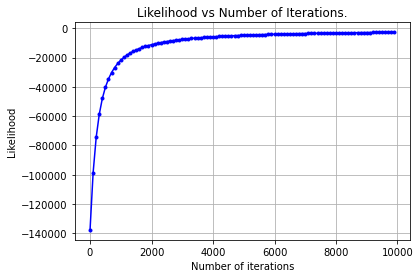

In [52]:
iters = np.array(range(0,num_iters,100))
plt.plot(iters,likelihood_values,'b.-')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()
plt.show(block=False)

### Step 6: Create and Fit the Logistic Regression Model using sklearn
This will be used to compare our default logistic regression with models that have regularization 

In [ ]:
# === sklearn's model implementation ===

def logreg_model(X_tr, y_tr, X_ts, y_ts, penalty, c, iters, ):
    acc_tr_logreg = []
    acc_ts_logreg = []
    c_logreg = []

    # create model 
    logreg = sk.linear_model.LogisticRegression(penalty=penalty, C=c, solver='saga',max_iter=iters)
    # fit the model and find the prediction on the training and testing set
    logreg.fit(X_tr, y_tr)
    yhat_tr = logreg.predict(X_tr)
    yhat_ts = logreg.predict(X_ts)
    # calculate and add accuracy values to respective lists
    acc_tr = logreg.score(X_tr, y_tr)
    acc_tr_logreg.append(acc_tr)
    acc_ts = logreg.score(X_ts, y_ts)
    acc_ts_logreg.append(acc_ts)

